In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

2023-11-17 02:06:40.098052: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [5]:
# load model
model = tf.keras.models.load_model('./models/object_detection.h5')
print('model loaded sucessfully')

model loaded sucessfully


In [6]:
path = './test_images/vehicle_1.jpg'
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output

In [7]:
# size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 2976
Width of the image = 3968


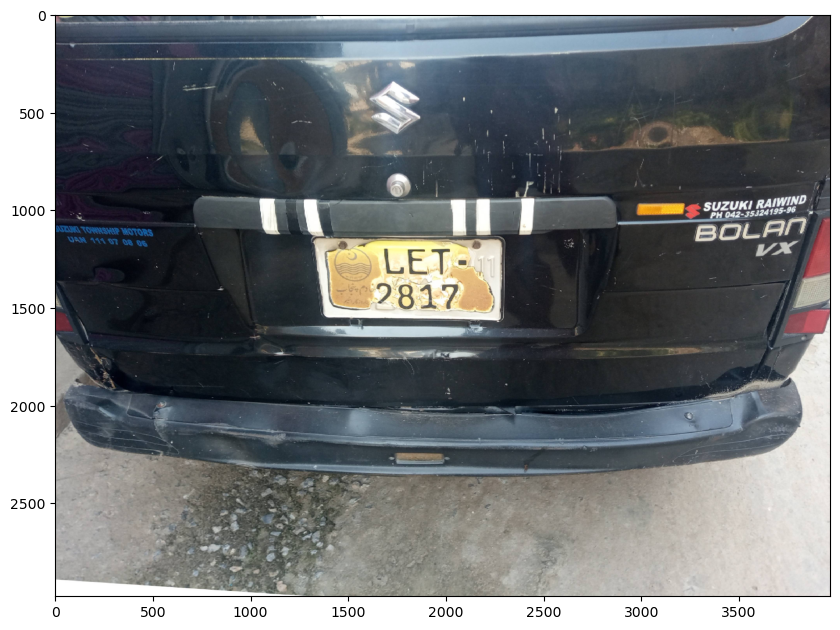

In [8]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [9]:
image_arr_224.shape

(224, 224, 3)

In [10]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [11]:
# make predictions
coords = model.predict(test_arr)
coords

1/1 [==============================] - 5s 5s/step


array([[0.36038712, 0.56767005, 0.39353794, 0.5445447 ]], dtype=float32)

In [12]:
# denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[1430.01607895, 2252.51474762, 1171.16890526, 1620.5650177 ]])

In [13]:
coords = coords.astype(np.int32)
coords

array([[1430, 2252, 1171, 1620]], dtype=int32)

(1430, 1171) (2252, 1620)


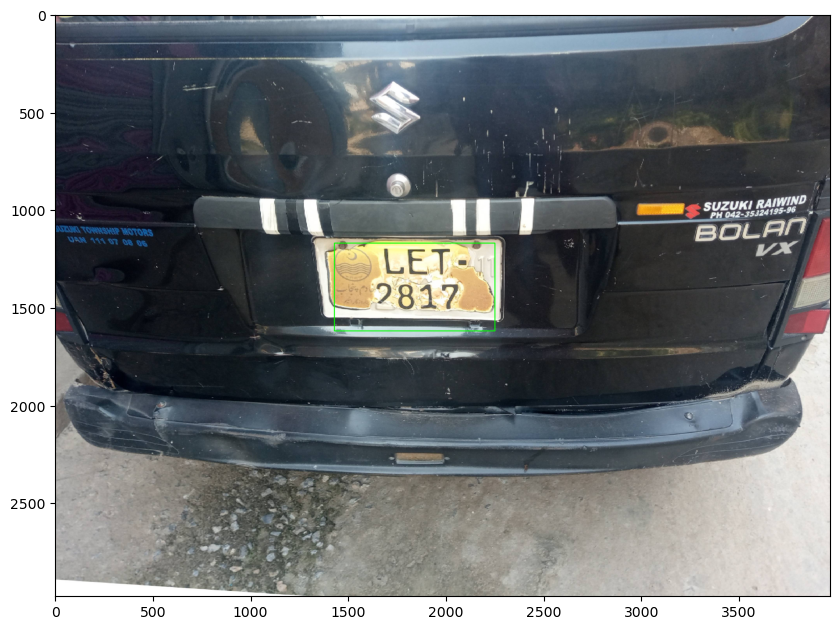

In [14]:
# draw bounding on top the image
xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [15]:
# create pipeline
path = './test_images/N207.jpeg'
def object_detection(path):
    # read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    # make predictions
    coords = model.predict(test_arr)
    # denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

1/1 [==============================] - 0s 213ms/step
(231, 226) (292, 277)


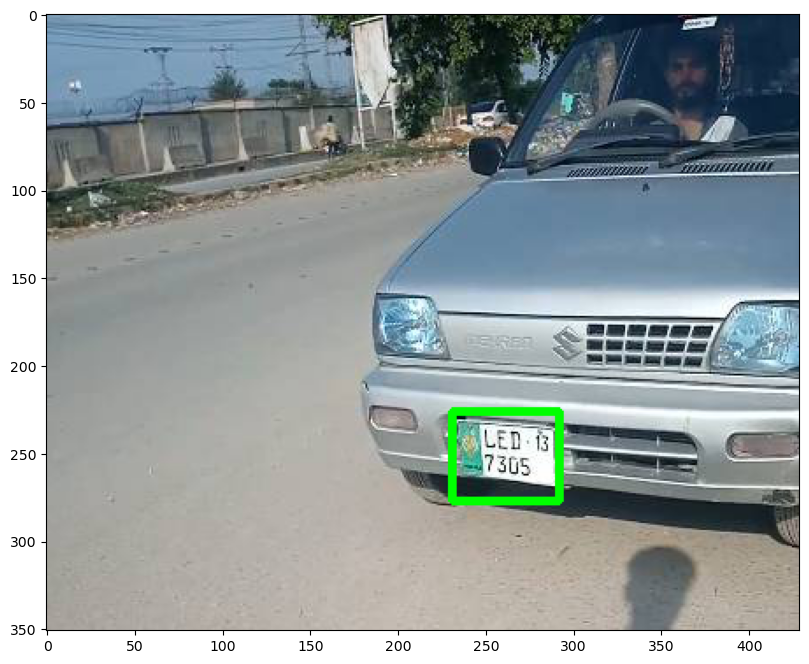

In [16]:
path = './test_images/vehicle_56.jpg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# Optical Character Recognition - OCR

In [17]:
import pytesseract as pt

1/1 [==============================] - 0s 251ms/step
(231, 226) (292, 277)


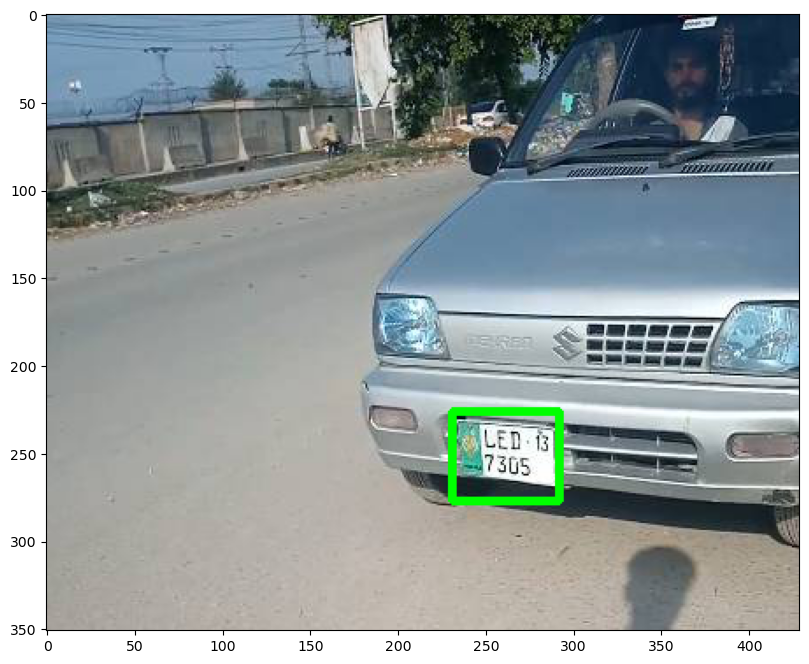

In [33]:
path = './test_images/vehicle_56.jpg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [55]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]
roi

array([[[205, 210, 213],
        [198, 203, 207],
        [196, 204, 207],
        ...,
        [196, 207, 213],
        [196, 207, 213],
        [197, 208, 212]],

       [[172, 180, 182],
        [184, 192, 195],
        [192, 200, 203],
        ...,
        [197, 208, 212],
        [196, 207, 211],
        [197, 208, 212]],

       [[ 89,  97,  99],
        [104, 112, 115],
        [ 90, 100, 102],
        ...,
        [191, 202, 206],
        [191, 202, 206],
        [191, 202, 206]],

       ...,

       [[ 52,  56,  57],
        [ 28,  33,  36],
        [ 28,  33,  36],
        ...,
        [ 36,  45,  54],
        [ 35,  44,  53],
        [ 35,  44,  53]],

       [[ 79,  81,  78],
        [ 61,  63,  62],
        [ 53,  57,  58],
        ...,
        [ 34,  44,  53],
        [ 34,  44,  53],
        [ 34,  44,  53]],

       [[ 83,  82,  78],
        [ 70,  70,  68],
        [ 67,  67,  65],
        ...,
        [ 33,  46,  55],
        [ 33,  46,  55],
        [ 33,  46,  55]]

In [89]:
license_plate = roi
gray = cv2.cvtColor(license_plate, cv2.COLOR_BGR2GRAY)
# equalized_image = cv2.equalizeHist(gray)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_image = clahe.apply(gray)

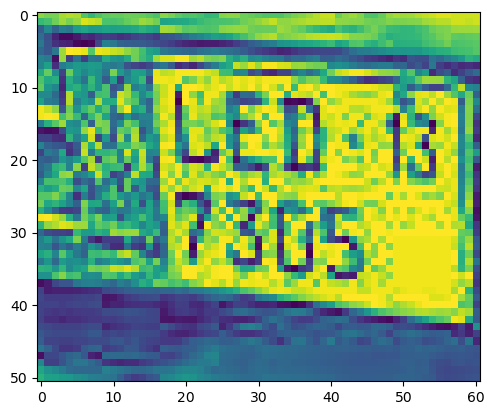

In [90]:
plt.imshow(enhanced_image)
plt.show()

In [92]:
import easyocr

In [96]:
reader = easyocr.Reader(['en'])
output = reader.readtext(enhanced_image)

for out in output:
    text_bbox, text, text_score = out
    if text_score > 0.4:
        print(text, text_score)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


LED 0.8941518068313599
7305 0.9909754808533691
